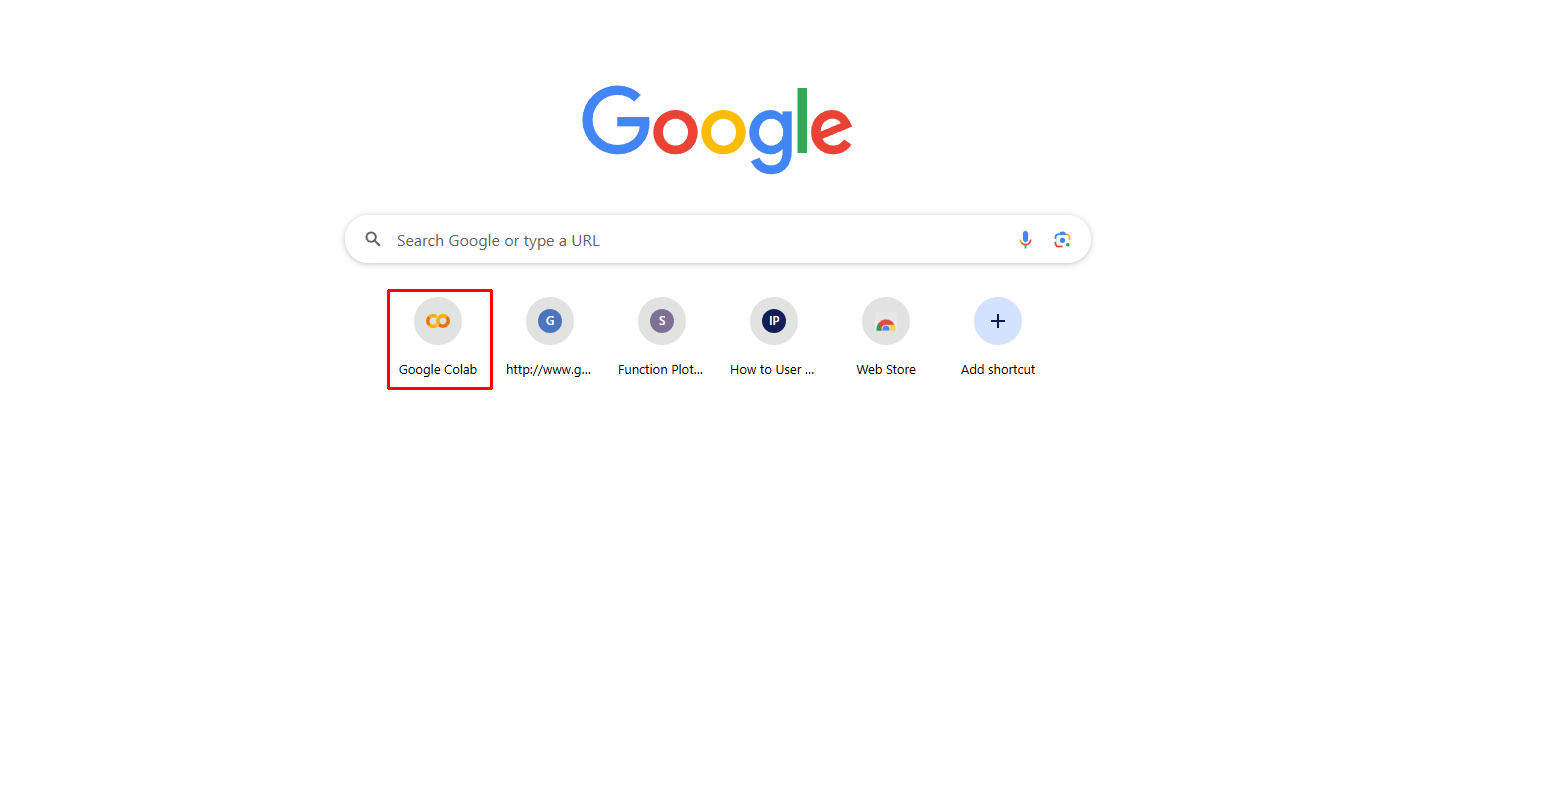

Best match found at: Top Left: (388, 290), Bottom Right: (491, 388)
Match Confidence (Normalized Cross-Correlation): 0.9999966025352478


True

In [ ]:
#@title Matching_BBox
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For Colab display
def find_best_match(capture_path, crop_path):
    """
    Finds the best matching region of a cropped image within a larger capture image
    and draws a rectangle around the matched region.

    Args:
        capture_path: Path to the full capture image.
        crop_path: Path to the cropped image.

    Returns:
        None. Displays the image with the bounding box.  Prints match details.
        Returns False if there's an issue reading the files.
    """
    try:
        # Load the images
        capture_img = cv2.imread(capture_path)
        crop_img = cv2.imread(crop_path)

        if capture_img is None or crop_img is None:
            print(f"Error: Could not read one or both of the images. Check file paths.")
            return False

        # Convert images to grayscale (for template matching)
        capture_gray = cv2.cvtColor(capture_img, cv2.COLOR_BGR2GRAY)
        crop_gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)

        # Template Matching
        result = cv2.matchTemplate(capture_gray, crop_gray, cv2.TM_CCOEFF_NORMED)

        # Find the best match location
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        top_left = max_loc
        h, w = crop_gray.shape[:2]  # Get height and width of the crop
        bottom_right = (top_left[0] + w, top_left[1] + h)

        # Draw the rectangle
        cv2.rectangle(capture_img, top_left, bottom_right, (0, 0, 255), 2)  # Red rectangle

        # Display the image with the rectangle (Colab version)
        cv2_imshow(capture_img)
       # cv2.waitKey(0)  # Not needed in Colab
       # cv2.destroyAllWindows()  # Not needed in Colab

        print(f"Best match found at: Top Left: {top_left}, Bottom Right: {bottom_right}")
        print(f"Match Confidence (Normalized Cross-Correlation): {max_val}")

    except Exception as e:
        print(f"An error occurred: {e}")
        return False

    return True  # Successful run
# Example usage:
full_image_path = "/content/Capture.PNG" # @param {"type":"string"}
cropped_image_path = "/content/crop.PNG" # @param {"type":"string"}
find_best_match(full_image_path, cropped_image_path)

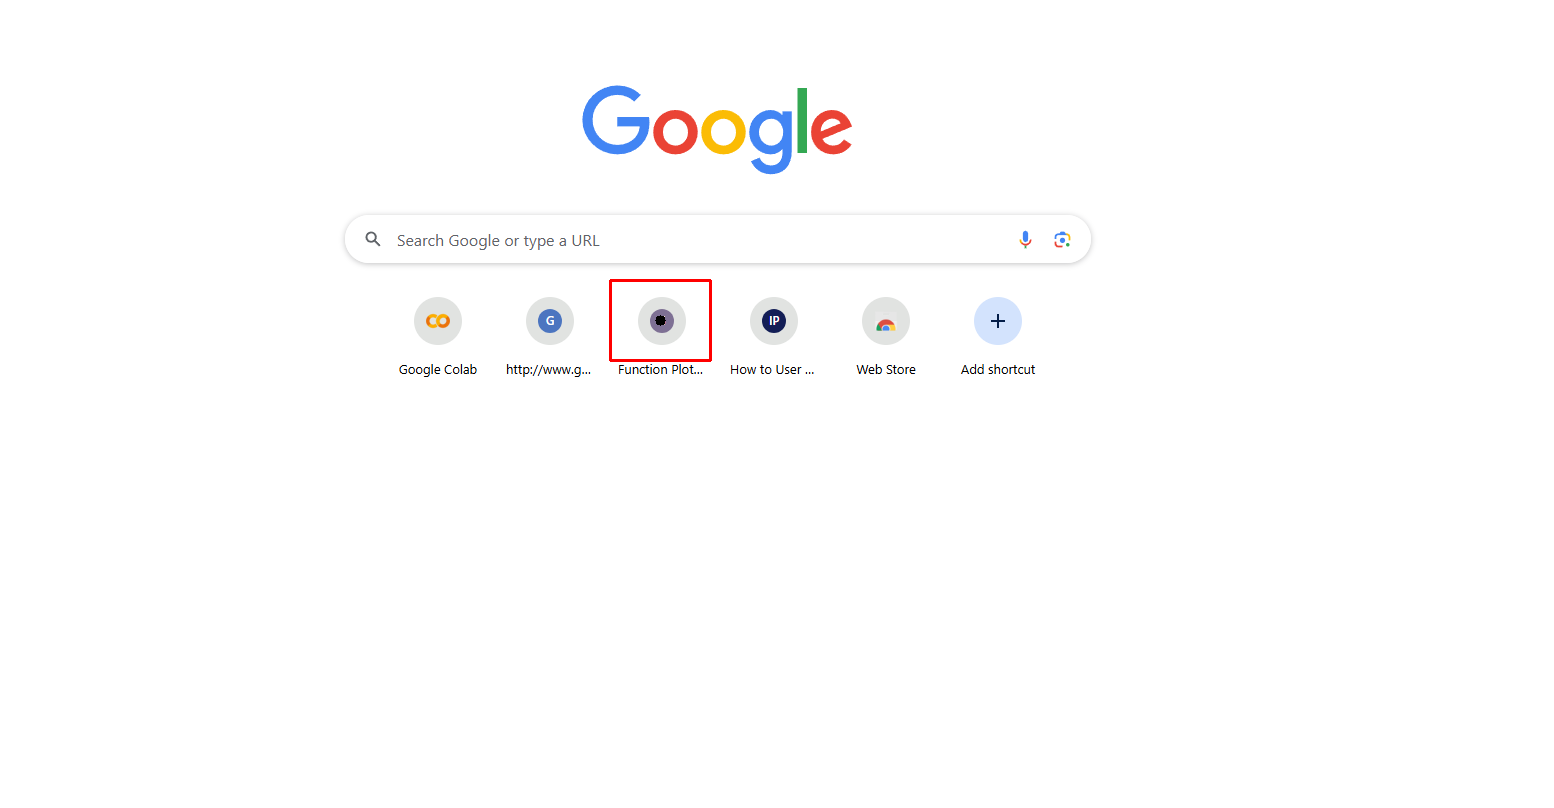

Best match found at: Top Left: (610, 280), Bottom Right: (710, 360)
Center of bounding box: (660, 320)
Match Confidence: 1.0


True

In [14]:
#@title Matching_BBox
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For Colab display

def find_best_match(capture_path, crop_path):
    """
    Finds the best matching region, draws a rectangle, and marks the center.
    """
    try:
        capture_img = cv2.imread(capture_path)
        crop_img = cv2.imread(crop_path)

        if capture_img is None or crop_img is None:
            print("Error: Could not read one or both of the images.")
            return False

        capture_gray = cv2.cvtColor(capture_img, cv2.COLOR_BGR2GRAY)
        crop_gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)

        result = cv2.matchTemplate(capture_gray, crop_gray, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        top_left = max_loc
        h, w = crop_gray.shape[:2]
        bottom_right = (top_left[0] + w, top_left[1] + h)

        # Calculate center of bounding box
        center_x = (top_left[0] + bottom_right[0]) // 2
        center_y = (top_left[1] + bottom_right[1]) // 2

        # Draw the rectangle
        cv2.rectangle(capture_img, top_left, bottom_right, (0, 0, 255), 2)  # Red rectangle

        # Draw a black circle at the center
        cv2.circle(capture_img, (center_x, center_y), 5, (0, 0, 0), -1)  # Black circle

        cv2_imshow(capture_img)

        print(f"Best match found at: Top Left: {top_left}, Bottom Right: {bottom_right}")
        print(f"Center of bounding box: ({center_x}, {center_y})")  # Print the center
        print(f"Match Confidence: {max_val}")

    except Exception as e:
        print(f"An error occurred: {e}")
        return False

    return True

# Example usage:
full_image_path = "/content/Capture.PNG" # @param {"type":"string"}
cropped_image_path = "/content/Casspture.PNG" # @param {"type":"string"}
find_best_match(full_image_path, cropped_image_path)